In [1]:
import os
os.chdir("/y/home/zyw/tmp/DeepPurpose/")

In [2]:
from DeepPurpose import utils,dataset,DTI

In [3]:
#加载数据
X_drug, X_target, y = dataset.load_process_DAVIS('./data/', binary = False)

Beginning Processing...
Default set to logspace (nM -> p) for easier regression
Done!


In [4]:
#设置编码器
drug_encoding = 'CNN'
target_encoding = 'Transformer'

In [5]:
#分割训练集、验证集和测试集
train, val, test = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method = 'random',
                                frac = [0.7,0.1,0.2])

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


In [6]:
# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         test_every_X_epoch = 10, 
                         LR = 0.001, 
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3, 
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12])

In [7]:
#模型初始化
model = DTI.model_initialize(**config)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 31.9478. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.06444. Total time 0.02111 hours
Validation at Epoch 1 with loss:0.44271, MSE: 0.67488 , Pearson Correlation: 0.41392 with p-value: 8.88260 , Concordance Index: 0.72430
Training at Epoch 2 iteration 0 with loss 0.51213. Total time 0.03666 hours
Training at Epoch 2 iteration 100 with loss 0.98576. Total time 0.0575 hours
Validation at Epoch 2 with loss:0.63264, MSE: 0.64074 , Pearson Correlation: 0.50815 with p-value: 4.08414 , Concordance Index: 0.77269
Training at Epoch 3 iteration 0 with loss 0.67944. Total time 0.07333 hours
Training at Epoch 3 iteration 100 with loss 0.64542. Total time 0.09388 hours
Validation at Epoch 3 with loss:1.20499, MSE: 0.55795 , Pearson Correlation: 0.57305 with p-value: 5.36952 , Concordance Index: 0.78272
Training at Epoch 4 iteration 0 with loss 0.43768. Total time 0.10972

Training at Epoch 29 iteration 100 with loss 0.33484. Total time 1.03555 hours
Validation at Epoch 29 with loss:0.38013, MSE: 0.32669 , Pearson Correlation: 0.77399 with p-value: 0.0 , Concordance Index: 0.85653
Training at Epoch 30 iteration 0 with loss 0.21764. Total time 1.05166 hours
Training at Epoch 30 iteration 100 with loss 0.45605. Total time 1.0725 hours
Validation at Epoch 30 with loss:0.55129, MSE: 0.47608 , Pearson Correlation: 0.78015 with p-value: 0.0 , Concordance Index: 0.85523
Training at Epoch 31 iteration 0 with loss 0.49482. Total time 1.08861 hours
Training at Epoch 31 iteration 100 with loss 0.33781. Total time 1.10916 hours
Validation at Epoch 31 with loss:0.19069, MSE: 0.33380 , Pearson Correlation: 0.78056 with p-value: 0.0 , Concordance Index: 0.85965
Training at Epoch 32 iteration 0 with loss 0.26986. Total time 1.12472 hours
Training at Epoch 32 iteration 100 with loss 0.41467. Total time 1.14583 hours
Validation at Epoch 32 with loss:0.57229, MSE: 0.32623 

Training at Epoch 58 iteration 0 with loss 0.17313. Total time 2.0675 hours
Training at Epoch 58 iteration 100 with loss 0.23484. Total time 2.08805 hours
Validation at Epoch 58 with loss:0.20377, MSE: 0.27131 , Pearson Correlation: 0.81795 with p-value: 0.0 , Concordance Index: 0.87723
Training at Epoch 59 iteration 0 with loss 0.21575. Total time 2.10416 hours
Training at Epoch 59 iteration 100 with loss 0.17151. Total time 2.125 hours
Validation at Epoch 59 with loss:0.24413, MSE: 0.29505 , Pearson Correlation: 0.80826 with p-value: 0.0 , Concordance Index: 0.87893
Training at Epoch 60 iteration 0 with loss 0.20267. Total time 2.14083 hours
Training at Epoch 60 iteration 100 with loss 0.38336. Total time 2.16111 hours
Validation at Epoch 60 with loss:0.31613, MSE: 0.27120 , Pearson Correlation: 0.81865 with p-value: 0.0 , Concordance Index: 0.87854
Training at Epoch 61 iteration 0 with loss 0.19035. Total time 2.17722 hours
Training at Epoch 61 iteration 100 with loss 0.29176. Total

Validation at Epoch 86 with loss:0.18333, MSE: 0.25930 , Pearson Correlation: 0.82979 with p-value: 0.0 , Concordance Index: 0.88430
Training at Epoch 87 iteration 0 with loss 0.17531. Total time 3.105 hours
Training at Epoch 87 iteration 100 with loss 0.19548. Total time 3.12472 hours
Validation at Epoch 87 with loss:0.29764, MSE: 0.24436 , Pearson Correlation: 0.84067 with p-value: 0.0 , Concordance Index: 0.88420
Training at Epoch 88 iteration 0 with loss 0.18477. Total time 3.14027 hours
Training at Epoch 88 iteration 100 with loss 0.14609. Total time 3.16055 hours
Validation at Epoch 88 with loss:0.09842, MSE: 0.29355 , Pearson Correlation: 0.82194 with p-value: 0.0 , Concordance Index: 0.87547
Training at Epoch 89 iteration 0 with loss 0.24850. Total time 3.17611 hours
Training at Epoch 89 iteration 100 with loss 0.19413. Total time 3.19666 hours
Validation at Epoch 89 with loss:0.43693, MSE: 0.25384 , Pearson Correlation: 0.83549 with p-value: 0.0 , Concordance Index: 0.86941
Tr

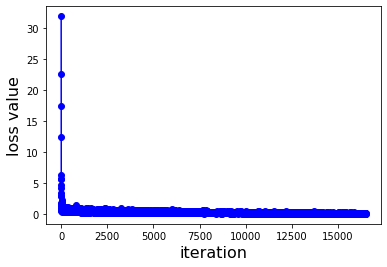

In [8]:
model.train(train, val, test)

In [10]:
#保存模型
model.save_model('./save_model/model_CNN_Transformer_Davis')